In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

stock_prices = pd.read_csv("stock_prices.csv")
len(stock_prices)

269881

In [3]:
stock_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867


In [4]:
stock_prices.isna().sum()

RowId                    0
Date                     0
SecuritiesCode           0
Open                   818
High                   818
Low                    818
Close                  818
Volume                   0
AdjustmentFactor         0
ExpectedDividend    267870
SupervisionFlag          0
Target                   8
dtype: int64

In [5]:
from scipy import stats
import datetime as dt
def pre_process(data):
    data['ExpectedDividend'] = data['ExpectedDividend'].fillna(0)
    data["SupervisionFlag"] = data["SupervisionFlag"].astype(int)
    data['Target'] = data['Target'].fillna(0)
    
    cols = ['Open', 'High', 'Low', 'Close']
    data.loc[:,cols] = data.loc[:,cols].ffill()
    data.loc[:,cols] = data.loc[:,cols].bfill()
    # data = data.drop(['RowId', 'High', 'Low', 'Target'], axis=1)
    data = data.drop(['RowId', 'Target'], axis=1)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date']=data['Date'].map(dt.datetime.toordinal)
    
    return data

In [6]:
data = pre_process(stock_prices)

In [7]:
# Predicting the Close price for the stock
X_data = data.drop(['Close'], axis=1)
y_data = data['Close']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X_data,y_data,test_size =0.2)
print("Length of training dataset:", len(x_train))
print("Length of training dataset:", len(x_test))

Length of training dataset: 215904
Length of training dataset: 53977


In [9]:
# Data prep
rf_data = data
rf_X_data = rf_data.drop(['Close'], axis=1)
rf_y_data = rf_data['Close']
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_X_data,rf_y_data,test_size =0.2)
print("Total training dataset: ", len(rf_x_train))
print("Total testing dataset: ", len(rf_x_test))

Total training dataset:  215904
Total testing dataset:  53977


In [12]:
# Training the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(rf_x_train, rf_y_train)
rf_train_predict = rf.predict(rf_x_train)
rf_test_predict = rf.predict(rf_x_test)
np.sqrt(metrics.mean_squared_error(rf_y_test, rf_test_predict))

312.53522418635487

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


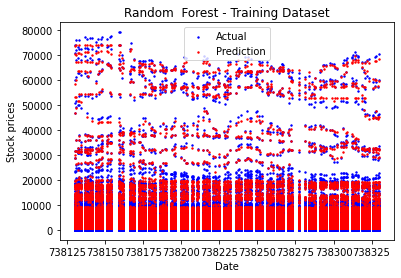

In [13]:
#  Metrics 
import matplotlib.pyplot as plt
plt.scatter(rf_x_train['Date'], rf_y_train, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(rf_x_train['Date'], rf_train_predict, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Random  Forest - Training Dataset')
plt.legend()
plt.show()

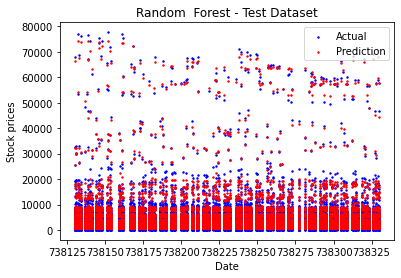

In [14]:
# Metrics 
import matplotlib.pyplot as plt
plt.scatter(rf_x_test['Date'], rf_y_test, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(rf_x_test['Date'], rf_test_predict, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Random  Forest - Test Dataset')
plt.legend()
plt.show()

In [15]:
xgb_data = data[data['SecuritiesCode']==1429]
xgb_X_data = xgb_data.drop(['Close', 'SecuritiesCode'], axis=1)
xgb_y_data = xgb_data['Close']
xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X_data,xgb_y_data,test_size =0.2)
print("Total training dataset: ", len(xgb_x_train))
print("Total testing dataset: ", len(xgb_x_test))

Total training dataset:  108
Total testing dataset:  27


In [16]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(xgb_x_train, xgb_y_train)
xgb_train_predict = xgb.predict(xgb_x_train)
xgb_test_predict = xgb.predict(xgb_x_test)
np.sqrt(metrics.mean_squared_error(xgb_y_test, xgb_test_predict))

[06:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


7.532647542431963

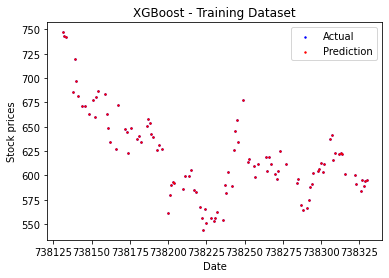

In [17]:
#  Metrics 
import matplotlib.pyplot as plt
plt.scatter(xgb_x_train['Date'], xgb_y_train, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(xgb_x_train['Date'], xgb_train_predict, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('XGBoost - Training Dataset')
plt.legend()
plt.show()

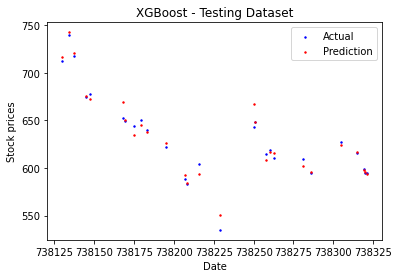

In [18]:
import matplotlib.pyplot as plt
plt.scatter(xgb_x_test['Date'], xgb_y_test, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(xgb_x_test['Date'], xgb_test_predict, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('XGBoost - Testing Dataset')
plt.legend()
plt.show()

In [19]:
xgb_data = data
xgb_X_data = xgb_data.drop(['Close'], axis=1)
xgb_y_data = xgb_data['Close']
xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X_data,xgb_y_data,test_size =0.2)
print("Total training dataset: ", len(xgb_x_train))
print("Total testing dataset: ", len(xgb_x_test))

Total training dataset:  215904
Total testing dataset:  53977


In [20]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(xgb_x_train, xgb_y_train)
xgb_train_predict = xgb.predict(xgb_x_train)
xgb_test_predict = xgb.predict(xgb_x_test)
np.sqrt(metrics.mean_squared_error(xgb_y_test, xgb_test_predict))

[06:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


44.8742328322485

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


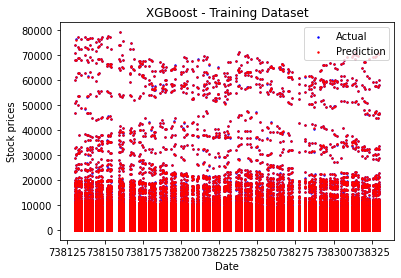

In [21]:
#  Metrics 
import matplotlib.pyplot as plt
plt.scatter(xgb_x_train['Date'], xgb_y_train, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(xgb_x_train['Date'], xgb_train_predict, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('XGBoost - Training Dataset')
plt.legend()
plt.show()


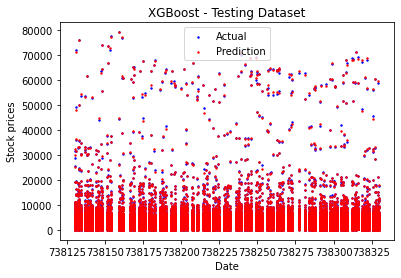

In [22]:
import matplotlib.pyplot as plt
plt.scatter(xgb_x_test['Date'], xgb_y_test, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(xgb_x_test['Date'], xgb_test_predict, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('XGBoost - Testing Dataset')
plt.legend()
plt.show()